# Dropout

In [1]:
import tensorflow as tf

from d2l.tensorflow import data, models, activations, plot, metrics, losses, optimizers

In [2]:
def dropout(X, drop_rate):
    assert 0 <= drop_rate <= 1, 'dropout rate must be a probability'
    if drop_rate == 1:
        return tf.zeros_like(X)
    mask = tf.random.uniform(shape=X.shape, minval=0, maxval=1) > drop_rate
    return (X * tf.cast(mask, X.dtype)) / (1 - drop_rate)

## Define model

In [3]:
drop_rates = [0.4, 0.8]

def net(X, inference=False):
    X = tf.reshape(X, (-1, num_inputs))

    for i in range(len(W) - 1):
        X = activations.relu(tf.matmul(X, W[i]) + b[i])
        if not inference:
            X = dropout(X, drop_rates[i])
    
    return tf.matmul(X, W[i + 1]) + b[i + 1]

## Load data

In [4]:
batch_size = 256

train_iter, test_iter = data.load_tfds_dataset('fashion_mnist', batch_size)## Model parameters

## Defining Model Parameters


In [5]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 1024, 2048

W0, b0 = models.initialize_parameters(num_inputs, num_hiddens1, stdev=0.01)
W1, b1 = models.initialize_parameters(num_hiddens1, num_hiddens2, stdev=0.01)
W2, b2 = models.initialize_parameters(num_hiddens2, num_outputs, stdev=0.01)

W = [W0, W1, W2]
b = [b0, b1, b2]

num_epochs, learning_rate, batch_size = 10, 0.5, 256

loss_function = losses.softmax_cross_entropy
eval_metric = metrics.accuracy
eval_function = metrics.evaluate_accuracy
optimizer = optimizers.sgd

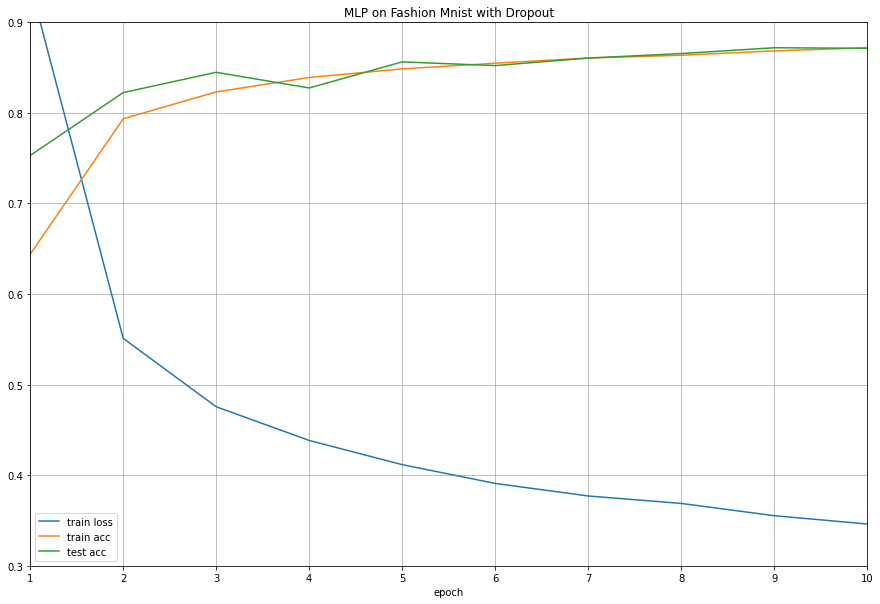

In [6]:
animator = plot.Animator(
    xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    legend=['train loss', 'train acc', 'test acc'], title='MLP on Fashion Mnist with Dropout'
)

for epoch in range(num_epochs):
    
    metric = metrics.Accumulator(3)

    for X, y in train_iter:
        with tf.GradientTape() as t:
            y_hat = net(X)
            loss = loss_function(y, y_hat)
        dW, db = t.gradient(loss, [W, b])
        optimizer(W, b, dW, db, learning_rate, batch_size)
        metric.add(tf.reduce_sum(loss), eval_metric(y, y_hat), y.shape[0])

    train_metrics = metric[0] / metric[2], metric[1] / metric[2]
    test_acc = eval_function(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))